In [1]:
from optparse import OptionParser
import json
import os
import pickle
import random
import re
import pandas as pd
import pysam
# import h5py
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from skimage.filters import threshold_li

In [4]:
Bonev2017_mESC_path = "/project/fudenber_735/GEO/bonev_2017_GSE96107/distiller-0.3.1_mm10/results/coolers/HiC_ES_all.mm10.mapq_30.2048.cool"

In [5]:
import warnings
warnings.filterwarnings("ignore") 

import numpy as np
import pandas as pd
import cooler
from cooltools.lib.numutils import observed_over_expected, adaptive_coarsegrain
from cooltools.lib.numutils import interpolate_bad_singletons, set_diag, interp_nan
from astropy.convolution import Gaussian2DKernel
from astropy.convolution import convolve
from bioframe.io.fileops import read_bigwig

In [6]:
# # with removed data extrapolation

# def get_target(cooler_path, padding, mseq_str, diagonal_offset=2):
    
#     genome_hic_cool = cooler.Cooler(cooler_path)
    
#     seq_hic_raw = genome_hic_cool.matrix(balance=True).fetch(mseq_str)

#     seq_hic_nan = np.isnan(seq_hic_raw)
#     # num_filtered_bins = np.sum(np.sum(seq_hic_nan,axis=0) == len(seq_hic_nan))

#     # clip first diagonals and high values
#     clipval = np.nanmedian(np.diag(seq_hic_raw, diagonal_offset))
#     for i in range(-diagonal_offset+1, diagonal_offset):
#         set_diag(seq_hic_raw, clipval, i)
#     seq_hic_raw = np.clip(seq_hic_raw, 0, clipval)
#     seq_hic_raw[seq_hic_nan] = np.nan
    
#     # adaptively coarsegrain based on raw counts
#     seq_hic_smoothed = adaptive_coarsegrain(
#                         seq_hic_raw,
#                         genome_hic_cool.matrix(balance=False).fetch(mseq_str),
#                         cutoff=2, max_levels=8)
#     seq_hic_nan = np.isnan(seq_hic_smoothed)
    
#     # local obs/exp
#     seq_hic_obsexp = observed_over_expected(seq_hic_smoothed, ~seq_hic_nan)[0]
#     log_hic_obsexp = np.log(seq_hic_obsexp)

#     # crop
#     if padding > 0:
#         log_hic_obsexp = log_hic_obsexp[padding:-padding,:]
#         log_hic_obsexp = log_hic_obsexp[:,padding:-padding]

#     # # aplying Gaussian Kernel
#     # kernel = Gaussian2DKernel(x_stddev=1)
#     # kernel_log_hic_obsexp = convolve(log_hic_obsexp, kernel)
    
#     # return kernel_log_hic_obsexp
#     return log_hic_obsexp

In [6]:
seq_len_nt = 1310720
padding = (640-512) // 2

In [7]:
explained_path = "./all_explained_boundaries.tsv"
unexplained_path = "./all_unexplained_boundaries.tsv"

In [8]:
explained_tads = pd.read_csv(explained_path, sep="\t", index_col=None)
unexplained_tads = pd.read_csv(unexplained_path, sep="\t", index_col=None)

In [10]:
# nan_percentages = []

# for index, row in explained_tads.iterrows():
#     if index % 100 == 0:
#         print("working on", index)
#     mseq_str = '%s:%d-%d' % (row.chrom, row.window_start, row.window_end)
#     matrix = get_target(Bonev2017_mESC_path, padding, mseq_str)
#     total_elements = matrix.size
    
#     # Count the number of NaNs in the matrix
#     nan_count = np.isnan(matrix).sum()
    
#     nan_percentage = (nan_count / total_elements) * 100
#     nan_percentages.append(nan_percentage)

working on 0
working on 100
working on 200
working on 300
working on 400
working on 500
working on 600
working on 700
working on 800
working on 900
working on 1000
working on 1100
working on 1200
working on 1300
working on 1400
working on 1500
working on 1600
working on 1700
working on 1800
working on 1900
working on 2000
working on 2100
working on 2200


In [11]:
# explained_tads["miss_per"] = nan_percentages

In [12]:
# explained_tads.to_csv("all_explained_boundaries.tsv", sep="\t", index=False)

In [10]:
# nan_percentages = []

# for index, row in unexplained_tads.iterrows():
#     if index % 100 == 0:
#         print("working on", index)
#     mseq_str = '%s:%d-%d' % (row.chrom, row.window_start, row.window_end)
#     matrix = get_target(Bonev2017_mESC_path, padding, mseq_str)
#     total_elements = matrix.size
    
#     # Count the number of NaNs in the matrix
#     nan_count = np.isnan(matrix).sum()
    
#     nan_percentage = (nan_count / total_elements) * 100
#     nan_percentages.append(nan_percentage)

working on 0
working on 100
working on 200
working on 300
working on 400
working on 500
working on 600
working on 700
working on 800
working on 900
working on 1000
working on 1100
working on 1200
working on 1300
working on 1400
working on 1500
working on 1600
working on 1700
working on 1800
working on 1900
working on 2000
working on 2100
working on 2200


In [11]:
# unexplained_tads["miss_per"] = nan_percentages

In [12]:
# unexplained_tads.to_csv("all_unexplained_boundaries.tsv", sep="\t", index=False)

In [11]:
from skimage.filters import threshold_li, threshold_otsu

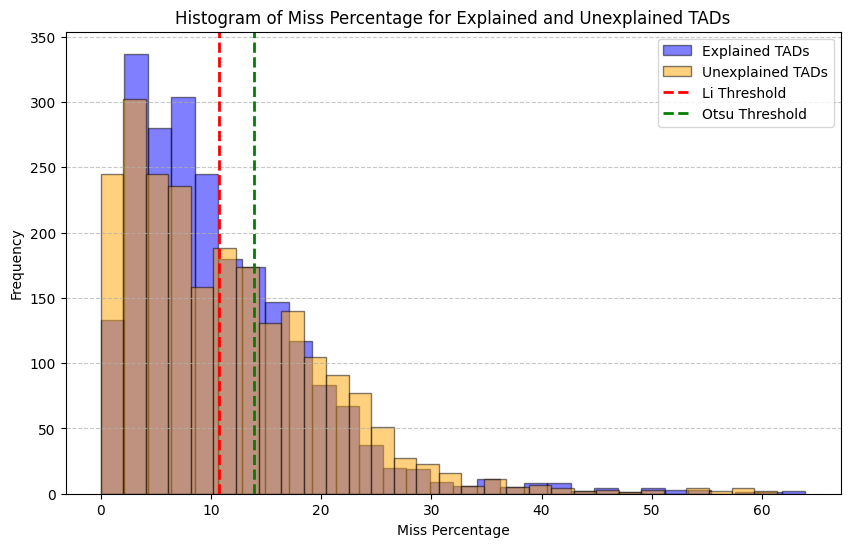

In [12]:
# Assuming explained_tads and unexplained_tads DataFrames have a column 'miss_per'
plt.figure(figsize=(10, 6))

# Plotting the histogram for explained_tads
plt.hist(explained_tads['miss_per'], bins=30, alpha=0.5, label='Explained TADs', color='blue', edgecolor='black')

# Plotting the histogram for unexplained_tads
plt.hist(unexplained_tads['miss_per'], bins=30, alpha=0.5, label='Unexplained TADs', color='orange', edgecolor='black')

thresholds_li = threshold_li(pd.concat([explained_tads['miss_per'], unexplained_tads['miss_per']]).values)
thresholds_otsu = threshold_otsu(pd.concat([explained_tads['miss_per'], unexplained_tads['miss_per']]).values)

plt.axvline(thresholds_li, color='red', linestyle='dashed', linewidth=2, label='Li Threshold')
plt.axvline(thresholds_otsu, color='green', linestyle='dashed', linewidth=2, label='Otsu Threshold')

# Adding labels and title
plt.xlabel('Miss Percentage')
plt.ylabel('Frequency')
plt.title('Histogram of Miss Percentage for Explained and Unexplained TADs')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# plt.savefig("./plots/missing_data_assessment.pdf", format="pdf")
# Show the plot
plt.show()

In [13]:
thresholds_li, thresholds_otsu

(10.711291171724747, 13.864854160966908)

In [20]:
percentage = (len(unexplained_tads[unexplained_tads['miss_per'] > thresholds_li]) / len(unexplained_tads))*100
print(f"{round(percentage,2)}% of unexplained TADs are within windows with at least {round(thresholds_li,2)}% of missing data")

45.07% of unexplained TADs are within windows with at least 10.71% of missing data


In [21]:
len(unexplained_tads[unexplained_tads['miss_per'] > thresholds_li])

1020

In [14]:
len(unexplained_tads[unexplained_tads['miss_per'] > thresholds_otsu])

769